## Importing the necessary Libraries

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## Loading the dataset

In [2]:
train_data = r"C:\Users\madhu\OneDrive\Pictures\fashion-mnist_train.csv"
test_data = r"C:\Users\madhu\OneDrive\Pictures\fashion-mnist_test.csv"

df_train = pd.read_csv(train_data)
df_test = pd.read_csv (test_data)

## Preprocessing the data

In [3]:
X_train = df_train.iloc [:,1:].values
y_train = df_train.iloc [:,0].values

In [4]:
X_test = df_test.iloc [:,1:].values
y_test = df_test.iloc [:,0].values

### Normalizing pixel values

In [5]:
X_train = X_train/255.0
X_test = X_test/255.0

### Reshape the data for CNN input

In [6]:
X_train = X_train.reshape (-1, 28, 28, 1)
X_test = X_test.reshape (-1, 28, 28, 1)

### Determining number of unique classes

In [16]:
class_names = {
    0: "T-shirt", 1: "Trouser", 2: "Pullover", 3: "Dress", 
    4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 
    8: "Bag", 9: "Ankle boot"
}

In [17]:
unique_classes = np.unique(y_train)
print("Unique Class Labels:", unique_classes)

Unique Class Labels: [0 1 2 3 4 5 6 7 8 9]


### Map Numerical labdels to class labels

In [18]:
named_classes = [class_names[label] for label in unique_classes if label in class_names]
print("Unique Class Names:", named_classes)

Unique Class Names: ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Defining CNN Model Architecture

In [23]:
model = keras.Sequential([  
    # Input Layer
    keras.layers.Input(shape=(28, 28, 1)),

    # Convolution Layer 1
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    # Convolution Layer 2
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    # Fully Connected Layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),

    # Output Layer
    keras.layers.Dense(num_classes, activation='softmax')
])

## Compiling the Model

In [25]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])

## Train the Model

In [26]:
model.fit(X_train, y_train, epochs =5, validation_data= (X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.7773 - loss: 0.6155 - val_accuracy: 0.8850 - val_loss: 0.3279
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8828 - loss: 0.3221 - val_accuracy: 0.8965 - val_loss: 0.2835
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9008 - loss: 0.2702 - val_accuracy: 0.9016 - val_loss: 0.2634
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9145 - loss: 0.2285 - val_accuracy: 0.9051 - val_loss: 0.2602
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9246 - loss: 0.2010 - val_accuracy: 0.9028 - val_loss: 0.2529


## Evaluate the Model

In [27]:
test_loss, test_acc = model.evaluate (X_test, y_test)
print (f" Test Accuracy : {test_acc:.5f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9023 - loss: 0.2605
 Test Accuracy : 0.90280


## Making Predictions on sample Image

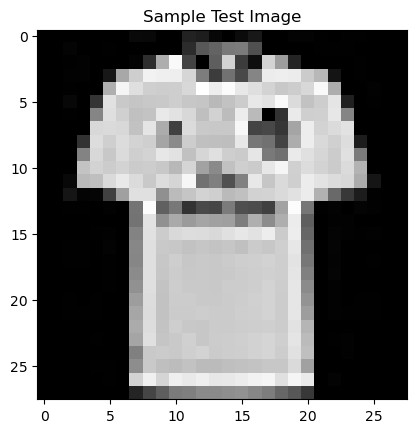

Predicted Label: 0 (T-shirt)


In [38]:
plt.imshow(X_test[0].reshape(28,28),cmap = 'gray')
plt.title ("Sample Test Image")
plt.show()
print(f"\033[1mPredicted Label: {predicted_label} ({class_names[predicted_label]})\033[0m")
           
           